In [20]:
file = 'C:/Users/Riya/Desktop/RHEA/6th sem/SNA/Project SNA/data2.csv'

In [21]:
import pandas as pd
df = pd.read_csv(file)
edge = []
for i in range(len(df)):
    tup =(df.iat[i,0],df.iat[i,1])
    edge.append(tup)
n = df.values.max()

In [22]:
import numpy as np
adj = np.zeros(shape=(n,n))
for e in edge:
    j = e[0]-1
    i = e[1]-1
    adj[i][j] = 1

In [ ]:
nadj = []
rem = []
k = -1
for i in adj:
    k += 1
    if 1 not in i:
        rem.append(k)
        continue
    nadj.append(i)

In [ ]:
nadj2 = []
for i in nadj:
    k = -1
    tmp = []
    for j in i:
        k += 1
        if k in rem:
            continue
        tmp.append(j)
    nadj2.append(tmp)

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(edge)

In [24]:
def check_existence(G,d):
    f = 0 # remains 0 if there is no node of degree <= d
    for each in G.nodes():
        if G.degree(each)<=d:
            f = 1
            break
    return f

In [25]:
def find(G,it):
    set1 = []
    for each in G.nodes():
        if G.degree(each) <= it:
            set1.append(each)
    return set1

In [26]:
H = G.copy()
it = 1
tmp = []
buckets = []
while(1):
    flag = check_existence(H,it)
    if flag==0:
        it += 1
        buckets.append(tmp)
        tmp = []
    if flag==1:
        node_set = find(H,it)
        for each in node_set:
            H.remove_node(each)
            tmp.append(each)
    if H.number_of_nodes() == 0:
        buckets.append(tmp)
        k_core = tmp
        break
#print(buckets)

In [28]:
len(k_core)

313

In [ ]:
n1 = len(nadj2)
indexes = np.arange(1,n1)
shell = np.zeros(n1,dtype = int)

In [ ]:
data = {}
data['index'] = indexes
data['shell'] = shell
b = 0
for bucket in buckets:
    b += 1
    for each in bucket:
        data.loc[data.index == each, 'shell']

In [ ]:
n1

In [ ]:
len(nadj2[0])

In [8]:
col_names =  ['node name', 'kshell']
data  = pd.DataFrame(columns = col_names)
b = 0
for bucket in buckets:
    b += 1
    for each in bucket:
        data = data.append(pd.Series([each, b], index=data.columns ), ignore_index=True)

In [18]:
data

NameError: name 'data' is not defined

In [9]:
list1 = []
for i in range(len(data)):
    list1.append([])

In [10]:
data["in-nodes"] = list1

In [ ]:
edge

In [11]:
for e in edge:
    indx = data.loc[data['node name'] == e[0]].index[0]
    if e[1] not in data['in-nodes'][indx]:
        data['in-nodes'][indx].append(e[1])

In [22]:
data.to_csv('snaksum.csv')

In [12]:
kin = []
for i in range(len(data)):
    kin.append(len(data['in-nodes'][i]))

In [13]:
data["Kin"] = kin

In [8]:
import random
def ic(G,s):
    #print(s)
    jst_inf = list(s)
    infected = list(s)
    while(1):
        #print(jst_inf, infected)
        if len(jst_inf) == 0:
            return infected
        tmp = []
        for each in jst_inf:
            for each1 in G.neighbors(each):
                r = random.uniform(0,1)
                if r < 0.5 and each1 not in infected and each1 not in tmp:
                    tmp.append(each1)
        for each in tmp:
            infected.append(each)
        jst_inf = list(tmp)

In [16]:
m = []
for i in range(len(data)):
    node = data['node name'][i]
    seed = [node]
    list1 = ic(G,seed)
    m.append(len(list1))

In [17]:
data["m"] = m

In [18]:
data.to_csv('snawe.csv')

In [20]:
ksum = []
for i in range(len(data)):
    neighbors = data['in-nodes'][i]
    sum = 0
    for each in neighbors:
        indx = data.loc[data['node name'] == each].index[0]
        sum += data['Kin'][indx]
    ksum.append(sum)
data['ksum'] = ksum

In [23]:
k2sum = []
for i in range(len(data)):
    neighours = data['in-nodes'][i]
    neigh2 = []
    sum = 0
    for each in neighbors:
        indx = data.loc[data['node name'] == each].index[0]
        eachs = data['in-nodes'][indx]
        for e in eachs:
            if e not in neigh2:
                neigh2.append(e)
                idx = data.loc[data['node name'] == e].index[0]
                sum += data['Kin'][idx]
    k2sum.append(sum)

KeyboardInterrupt: 

In [ ]:
data['k2sum'] = k2sum
data.to_csv('snak2sum.csv')

In [27]:
max(data['kshell'])

56

In [55]:
kshell = []
for i in data['kshell']:
    kshell.append(i)

In [39]:
nodes = []
for i in data['node name']:
    nodes.append(i)

In [51]:
kin1 = []
for i in data['Kin']:
    kin1.append(i)

In [83]:
inf = []
for i in data['m']:
    inf.append(i)

In [9]:
# information started from here
seed = [825,3028,1166,1918,2565,697,2411,3352,1549,766]

In [16]:
# nodes under influnce of information
list1 = ic(G,seed)

In [17]:
len(list1)

2232

In [57]:
kin2 = []
kshell2 = []
for i in range(len(nodes)):
    if nodes[i] in list1:
        kin2.append(kin1[i])
        kshell2.append(kshell[i])

In [84]:
inf2 = []
for i in range(len(nodes)):
    if nodes[i] in list1:
        inf2.append(inf[i])

In [61]:
len(list1)

2250

In [86]:
len(inf2)

2250

In [76]:
x2 = max(data['kshell'])

In [77]:
x1 = min(data['kshell'])

In [78]:
y2 = max(data['Kin'])

In [79]:
y1 = min(data['Kin'])

In [155]:
Mn = []
for i in range(x1,x2+1):
    n1 = []
    for j in range(y1,y2+1):
        iks = [k for k, x in enumerate(kshell2) if x == i]
        ikin = [k for k, x in enumerate(kin2) if x == j]
        n = []
        for k in iks:
            if k in ikin:
                n.append(k)
        n1.append(n)
    Mn.append(n1)

In [156]:
Mn

[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  

In [179]:
# average influence M
M = []
for i in range(len(Mn)):
    n = []
    for j in range(len(Mn[i])):
        n.append([])
    M.append(n)
    
for i in range(len(Mn)):
    for j in range(len(Mn[i])):
        # print(len(Mn[i][j]))
        N = len(Mn[i][j])
        sum = 0
        if N > 5:
            for k in Mn[i][j]:
                mi = inf2[k]
                sum += mi
            sum = math.log(sum)
        M[i][j] = sum

In [171]:
M

[[17,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [172]:
len(M)

56

In [160]:
len(M[0])

894

In [180]:
marray = np.zeros([len(M), len(M[0])])

In [181]:
marray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
import math

In [183]:
for i in range(len(Mn)):
    for j in range(len(Mn[i])):
        marray[i][j] = M[i][j]

In [184]:
marray

array([[2.83321334, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.77258872, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.29583687, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.77258872, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.89037176, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<function matplotlib.pyplot.show(*args, **kw)>

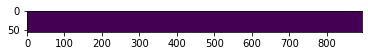

In [185]:
plt.imshow(marray)
plt.show

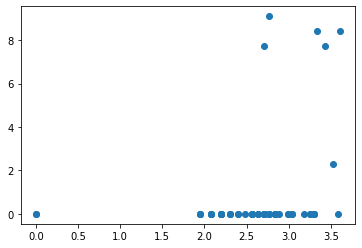

In [186]:
plt.scatter(marray[:,0], marray[:,1])

In [137]:
import seaborn as sb

In [187]:
mdf = pd.DataFrame(marray)

In [188]:
mdf

,0,1,2,3,4,5,6,7,8,9,...,884,885,886,887,888,889,890,891,892,893
0,2.833213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.772589,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.295837,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.258097,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.583519,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.332205,8.408494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.610918,8.406708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.295837,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.295837,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.433987,7.717796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
kin

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [168]:
mdf.to_csv('snavginfl2.csv')

In [149]:
nodes

[1300,
 52,
 4389,
 63,
 84,
 85,
 88,
 82,
 4896,
 117,
 118,
 119,
 112,
 123,
 114,
 137,
 141,
 146,
 149,
 7672,
 159,
 160,
 174,
 189,
 196,
 195,
 198,
 200,
 206,
 207,
 210,
 217,
 225,
 233,
 234,
 248,
 239,
 253,
 264,
 267,
 287,
 288,
 289,
 294,
 297,
 309,
 330,
 323,
 337,
 355,
 369,
 375,
 382,
 384,
 393,
 397,
 401,
 408,
 411,
 413,
 418,
 436,
 437,
 438,
 441,
 443,
 451,
 448,
 446,
 450,
 453,
 7034,
 7957,
 468,
 472,
 476,
 480,
 481,
 486,
 473,
 490,
 492,
 504,
 507,
 509,
 516,
 519,
 520,
 522,
 523,
 527,
 528,
 531,
 529,
 540,
 543,
 551,
 547,
 548,
 550,
 557,
 558,
 562,
 563,
 568,
 569,
 571,
 573,
 576,
 577,
 578,
 593,
 596,
 594,
 598,
 599,
 602,
 605,
 610,
 612,
 621,
 632,
 638,
 655,
 654,
 669,
 672,
 676,
 678,
 683,
 693,
 703,
 709,
 711,
 716,
 718,
 720,
 721,
 729,
 731,
 734,
 735,
 751,
 752,
 753,
 755,
 1971,
 767,
 773,
 774,
 776,
 783,
 785,
 799,
 807,
 819,
 821,
 1970,
 3105,
 835,
 843,
 845,
 847,
 867,
 874,
 876,
 

In [153]:
iks = [k for k, x in enumerate(kshell2) if x == 0]

In [154]:
iks

[]

Average of the list = 35.75


In [ ]:
Average()